<details>
<summary> Task Instruction </summary>

```
Here is the background information on your task
The team now has a good understanding of the data and feels confident to use the data to further understand the business problem. The team now needs to brainstorm and build out features to uncover signals in the data that could inform the churn model.

Feature engineering is one of the keys to unlocking predictive insight through mathematical modeling. Based on the data that is available and was cleaned, identify what you think could be drivers of churn for our client and build those features to later use in your model.

First focus on building on top of the feature that your colleague has already investigated: “the difference between off-peak prices in December and January the preceding year”. After this, if you have time, feel free to get creative with making any other features that you feel are worthwhile.

Once you have a set of features, you must train a Random Forest classifier to predict customer churn and evaluate the performance of the model with suitable evaluation metrics. Be rigorous with your approach and give full justification for any decisions made by yourself as the intern data scientist. 

Recall that the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it would be possible to predict customers likely to churn using a predictive model.

If you’re eager to go the extra mile for the client, when you have a trained predictive model, remember to investigate the client’s proposed discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

Build your models and test them while keeping in mind you would need data to prove/disprove the hypotheses, as well as to test the effect of a 20% discount on customers at high propensity to churn.


Here is your task

Sub-Task 1

Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power. 

This feature is “the difference between off-peak prices in December and January the preceding year”. 

Run the cells in the notebook provided (named feature_engineering.ipynb) to re-create this feature. then try to think of ways to improve the feature’s predictive power and elaborate why you made those choices. 

You should spend 1 - 1.5 hours on this. Be sure to make use of the “feature_engineering.ipynb” notebook to get started with re-creating your colleagues' features.

Sub-Task 2

Now that you have a dataset of cleaned and engineered features, it is time to build a predictive model to see how well these features are able to predict a customer churning. It is your task to train a Random Forest classifier and to evaluate the results in an appropriate manner. We would also like you to document the advantages and disadvantages of using a Random Forest for this use case. It is up to you how to fulfill this task, but you may want to use the below points to guide your work:

Ensure you’re able to explain the performance of your model, where did the model underperform?
Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
Document the advantages and disadvantages of using the Random Forest for this use case.
Do you think that the model performance is satisfactory? Give justification for your answer.
(Bonus) - Relate the model performance to the client's financial performance with the introduction of the discount proposition. How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?
```
<\details>



1. Import packages
2. Load data
3. Feature engineering
4. Modeling
5. Summary and Reflections

---

## Import packages

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

---
# Feature Engineering

## Load data

In [19]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [20]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.00000,44.311375,0.00000,0.00000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.00000,44.385450,0.00000,0.00000


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Assume my colleague has already investigated “the difference between off-peak prices in December and January the preceding year”. Here I will re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [21]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [7]:
diff['id'].unique

<bound method Series.unique of 0        0002203ffbb812588b632b9e628cc38d
1        0004351ebdd665e6ee664792efc4fd13
2        0010bcc39e42b3c2131ed2ce55246e3c
3        0010ee3855fdea87602a5b7aba8e42de
4        00114d74e963e47177db89bc70108537
                       ...               
16091    ffef185810e44254c3a4c6395e6b4d8a
16092    fffac626da707b1b5ab11e8431a4d0a2
16093    fffc0cacd305dd51f316424bbb08d1bd
16094    fffe4f5646aa39c7f97f95ae2679ce64
16095    ffff7fa066f1fb305ae285bb03bf325a
Name: id, Length: 16096, dtype: object>

### Merge with client features

In [8]:
merged_data = pd.merge(df, diff, on='id', how='left')
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,1,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,-0.006192,0.162916


### Encode categorical features

In [9]:
# encode channel_sales with integer values
merged_data['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [10]:
# use label encoder to encode channel_sales
le = LabelEncoder()
merged_data['channel_sales'] = le.fit_transform(merged_data['channel_sales'])
merged_data['channel_sales'].unique()

array([4, 0, 5, 7, 2, 1, 6, 3])

In [11]:
merged_data['has_gas'].unique()

array(['t', 'f'], dtype=object)

In [12]:
# encode true of false values with 1 and 0 for has_gas
merged_data['has_gas'] = merged_data['has_gas'].map({'t': 1, 'f': 0})

In [13]:
merged_data['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [14]:
# use label encoder to encode origin_up
merged_data['origin_up'] = le.fit_transform(merged_data['origin_up'])
merged_data['origin_up'].unique()

array([4, 2, 3, 0, 5, 1])

### Add time features

In [15]:
merged_data['contract_duration'] = (merged_data['date_end'] - merged_data['date_activ']).dt.days
merged_data['contract_activ_to_modif'] = (merged_data['date_modif_prod'] - merged_data['date_activ']).dt.days
merged_data['contract_modif_to_end'] = (merged_data['date_end'] - merged_data['date_modif_prod']).dt.days
merged_data['contract_renewal_to_end'] = (merged_data['date_end'] - merged_data['date_renewal']).dt.days

In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  int64         
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_7073/405778886.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')


<AxesSubplot: >

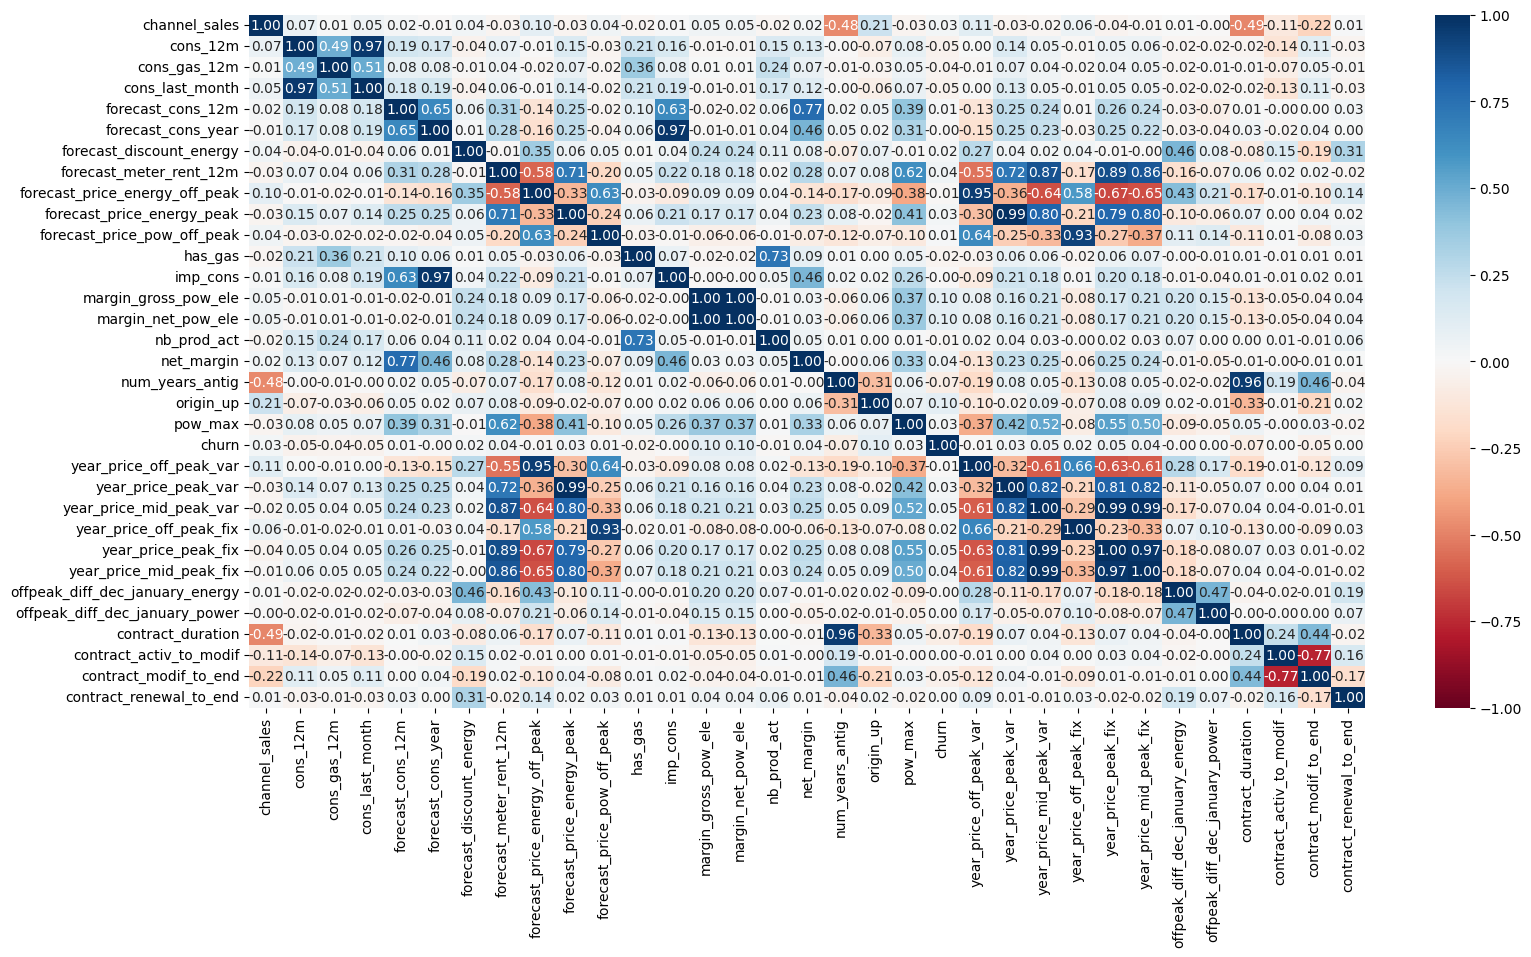

In [17]:
# quick look correlation matrix
plt.figure(figsize=(18, 9))
sns.heatmap(merged_data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')

In [26]:
# check correlation greater than 0.8
high_corr_var=np.where(merged_data.corr().abs()>0.85)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_7073/1140729119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_corr_var=np.where(merged_data.corr().abs()>0.85)


[('cons_12m', 'cons_last_month'),
 ('forecast_cons_year', 'imp_cons'),
 ('forecast_meter_rent_12m', 'year_price_mid_peak_var'),
 ('forecast_meter_rent_12m', 'year_price_peak_fix'),
 ('forecast_meter_rent_12m', 'year_price_mid_peak_fix'),
 ('forecast_price_energy_off_peak', 'year_price_off_peak_var'),
 ('forecast_price_energy_peak', 'year_price_peak_var'),
 ('forecast_price_pow_off_peak', 'year_price_off_peak_fix'),
 ('margin_gross_pow_ele', 'margin_net_pow_ele'),
 ('num_years_antig', 'contract_duration'),
 ('year_price_mid_peak_var', 'year_price_peak_fix'),
 ('year_price_mid_peak_var', 'year_price_mid_peak_fix'),
 ('year_price_peak_fix', 'year_price_mid_peak_fix')]

In [27]:
# remove features that are highly correlated'
merged_data = merged_data.drop(columns=['cons_last_month', 'imp_cons', 
                                        'year_price_mid_peak_var', 'year_price_peak_fix', 'year_price_mid_peak_fix',
                                        'year_price_off_peak_var', 'year_price_off_peak_fix', 'year_price_peak_var',
                                        'margin_net_pow_ele', 'contract_duration'])

-----
# Modeling

## Split data into train and test sets, and apply scaling

In [124]:
X = merged_data.drop(columns=['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn'])
y = merged_data['churn']

# split the data into train and test sets; stratify y to ensure equal distribution of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


Maybe we need to balanced the train set since the churn rate is about 9%. Otherwise we can use the balance parameter in the random forest classifier. I put both approach options here.

In [125]:
balance_train = False # or True
class_weight = 'balanced' # or None

In [126]:

if balance_train:
    # balance training data using smote
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

0    9890
1    1064
Name: churn, dtype: int64

Based on EDA, we can find that
- the consumption data are skewed with long tails
- some numerical features are not normally distributed

Therefore, I will apply log transformation to the consumption data and use MinMAxScaler to scale the numerical features.

In [127]:
# normalize the skewed consumption data with log transformation (use log1p to avoid log(0))
for dat in [X_train, X_test]:
    dat['cons_12m'] = np.log1p(dat['cons_12m'])
    dat['cons_gas_12m'] = np.log1p(dat['cons_gas_12m'])
    dat['forecast_cons_12m'] = np.log1p(dat['forecast_cons_12m'])
    dat['forecast_cons_year'] = np.log1p(dat['forecast_cons_year'])


In [128]:
# apply max-min normalization to numerical features
scaler = MinMaxScaler()

# fit the scaler on training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model training
Here I will use random forest classifier as an example.

In [129]:
# use random forest classifier to train the model
# create the model
rf = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight=class_weight)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=42)

## Model prediction and evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       1.00      1.00      1.00      1064

    accuracy                           1.00     10954
   macro avg       1.00      1.00      1.00     10954
weighted avg       1.00      1.00      1.00     10954



[]

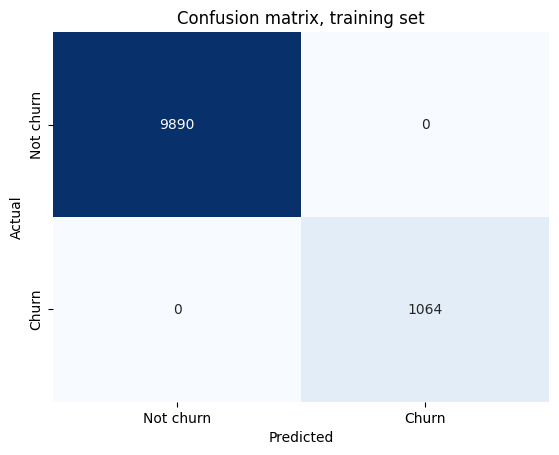

In [130]:
# check prediction on training set first
y_pred_train = rf.predict(X_train)

# print classification report
print(classification_report(y_train, y_pred_train))

# plot confusion matrix
ax = sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, cmap='Blues', fmt='d', cbar=False)
ax.set(xlabel='Predicted', ylabel='Actual', title='Confusion matrix, training set')
ax.set(xticklabels=['Not churn', 'Churn'], yticklabels=['Not churn', 'Churn'])
plt.plot()

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3297
           1       0.90      0.05      0.10       355

    accuracy                           0.91      3652
   macro avg       0.90      0.53      0.52      3652
weighted avg       0.91      0.91      0.87      3652



[]

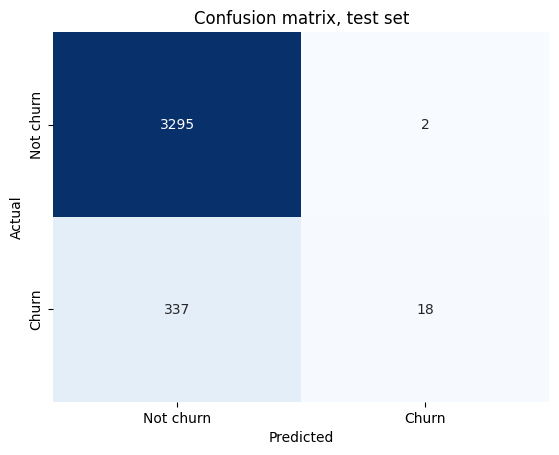

In [131]:
# make predictions on test data
y_pred = rf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# plot confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
ax.set(xlabel='Predicted', ylabel='Actual', title='Confusion matrix, test set')
ax.set(xticklabels=['Not churn', 'Churn'], yticklabels=['Not churn', 'Churn'])
plt.plot()

## Feature importance

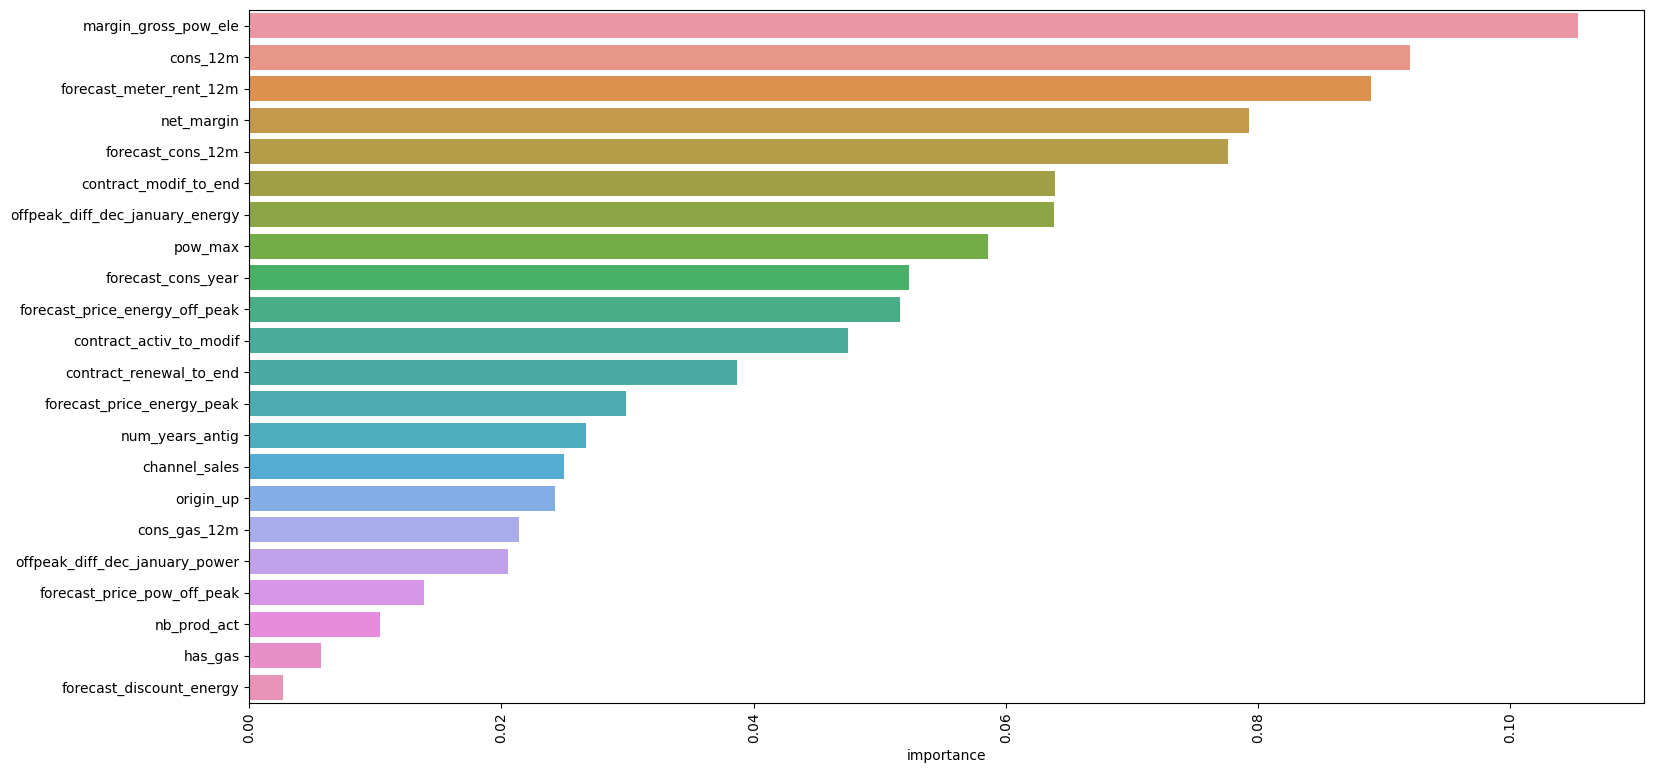

In [132]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# plot feature importance
plt.figure(figsize=(18, 9))
sns.barplot(y=feature_importances.index, x=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()

Looking at the feature importance, we can see that at least one 'elbow' between features with importance > 0.03 and features with importance < 0.03. This may suggest that we can remove some features with low importance to reduce the model complexity.

In [133]:
feature_importances.query('importance >= 0.03')['importance'].sum()

# can also try with 0.025
# feature_importances.query('importance >= 0.025')['importance'].sum()

0.8196934996313391

Therefore, if future models aim at reducing the model complexity, we can use the threshold of 0.02 or 0.01 to remove features.

---
# Conclusion and reflection
In summary, to predict customer churn probability using a set of features, I used a random forest binary classifier to achieve an accuracy of 90% on the test set. 

However, there are aspects of the model performance can be improved:
- the model overfits the training data
- although the accuracy is high, what we actually care about is the customer churn - which means the model should be optimized for precision and recall. However, the model returns quite low precision and recall scores. That means, while the model can accurately predict the customers who will not churn, it is not good at predicting the customers who will churn. 

The overfitting issue may be due to characteristics of the random forest model: it is powerful and accurate but may lead to overfitting. It may be improved by tuning the parameters of the model or using other models.

I have tackled the class imbalance issue by either resampling the training data or adding the class_weight parameter in the random forest classifier. However, the model performance is still not satisfactory. The resampling method returns a low precision score (0.37) as well as low accuracy score (0.09). The class_weight solution may have improved the precision score to 0.9 but the recall score is still low (0.05). 

This issue may be also improved by using other models. However, I think overall the model performance indicates a need for a more informative set of features either by adding more features or by using more advanced feature engineering techniques.

Back to the business hypothesis: is customer churn driven by price sensitivity in this case? I think we don't have enough evidence to support this hypothesis. The model performance is not satisfactory and the feature importance analysis does not show a high importance of the price-related features.